In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

In [5]:
df = pd.read_csv("diabetes_data_upload.csv")

In [6]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [7]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [8]:
df['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [9]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()

for column in df.columns[1:]:
    df[column]= label_encoder.fit_transform(df[column])

In [10]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


# conducting exploratory data analysis

In [11]:
X = df.drop('class',axis=1)
y = df['class']


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = pd.DataFrame(sc.fit_transform(X),columns=X.columns)

In [12]:
X.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,-0.661367,0.765092,-0.992337,1.109847,-0.846269,0.839594,-0.915126,-0.535844,-0.901025,1.027295,-0.565506,1.084312,-0.869918,1.290994,1.380227,2.215647
1,0.821362,0.765092,-0.992337,-0.901025,-0.846269,0.839594,-0.915126,-0.535844,1.109847,-0.973430,-0.565506,-0.922244,1.149534,-0.774597,1.380227,-0.451335
2,-0.578993,0.765092,1.007722,-0.901025,-0.846269,0.839594,1.092746,-0.535844,-0.901025,1.027295,-0.565506,1.084312,-0.869918,1.290994,1.380227,-0.451335
3,-0.249498,0.765092,-0.992337,-0.901025,1.181657,0.839594,1.092746,1.866215,-0.901025,1.027295,-0.565506,1.084312,-0.869918,-0.774597,-0.724518,-0.451335
4,0.986110,0.765092,1.007722,1.109847,1.181657,0.839594,1.092746,-0.535844,1.109847,1.027295,1.768328,1.084312,1.149534,1.290994,1.380227,2.215647
5,0.574241,0.765092,1.007722,1.109847,-0.846269,0.839594,1.092746,-0.535844,1.109847,1.027295,-0.565506,1.084312,-0.869918,1.290994,1.380227,2.215647
6,0.738988,0.765092,1.007722,1.109847,-0.846269,0.839594,1.092746,1.866215,-0.901025,-0.973430,-0.565506,1.084312,1.149534,-0.774597,-0.724518,-0.451335
7,1.480353,0.765092,1.007722,1.109847,1.181657,0.839594,-0.915126,-0.535844,1.109847,1.027295,1.768328,-0.922244,1.149534,1.290994,-0.724518,-0.451335
8,1.562727,0.765092,1.007722,1.109847,-0.846269,0.839594,1.092746,1.866215,-0.901025,1.027295,1.768328,-0.922244,1.149534,1.290994,-0.724518,2.215647
9,1.809848,0.765092,-0.992337,1.109847,1.181657,0.839594,1.092746,-0.535844,1.109847,1.027295,1.768328,-0.922244,-0.869918,-0.774597,1.380227,-0.451335


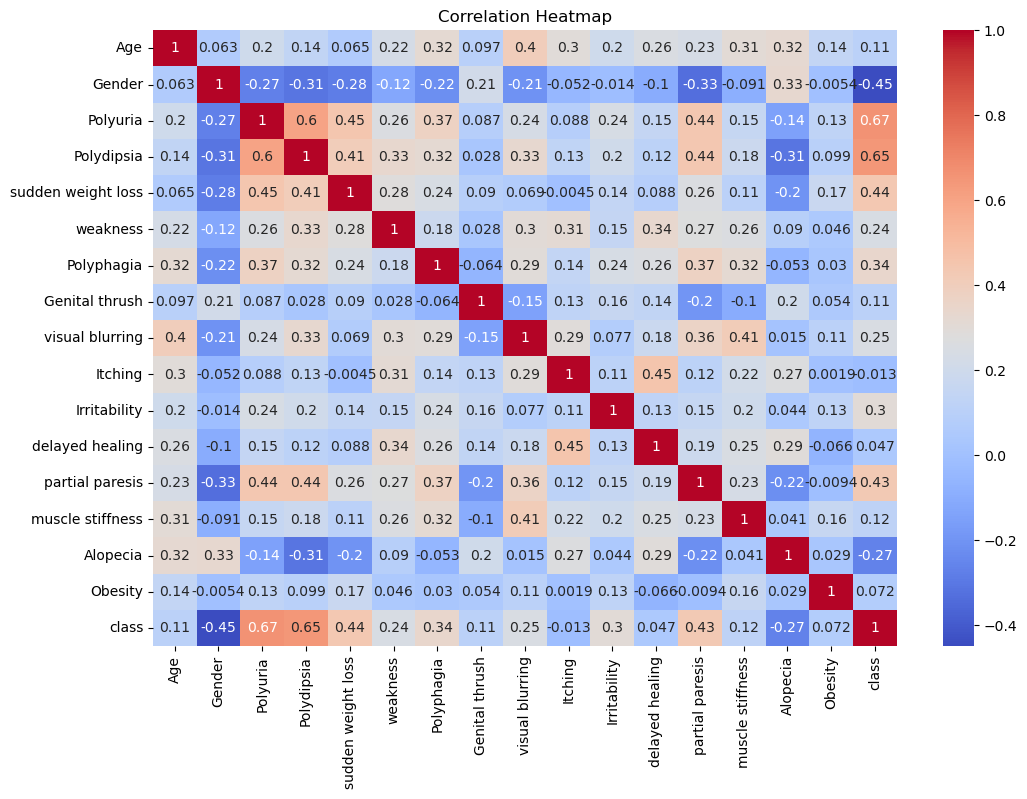

In [8]:
# Create a correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

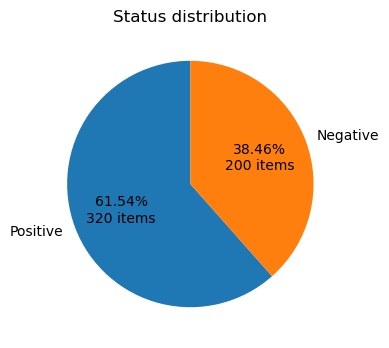

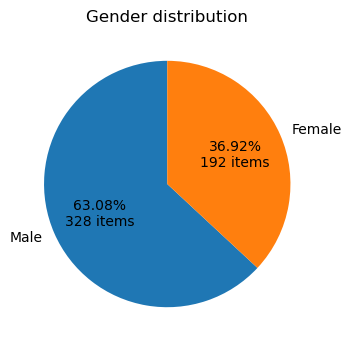

In [14]:
# Defining a function to plot a simple pie chart
def plotPie(value, title, label):
    plt.figure(figsize=(4,4))
    plt.pie(
        value.value_counts(),
        startangle=90,
        labels = label,
        autopct=(lambda p:f'{p:.2f}%\n{p*sum(value.value_counts())/100 :.0f} items')
    )
    plt.title(title)
    plt.show()

plotPie(df["class"], "Status distribution", ["Positive", "Negative"])
plotPie(df["Gender"], "Gender distribution", ["Male", "Female"])


In [13]:
ages = df["Age"]

In [14]:
# normalization 
df["Age"] = (ages - np.min(ages))/(np.max(ages)-np.min(ages))
df["Age"].head(10)

0    0.324324
1    0.567568
2    0.337838
3    0.391892
4    0.594595
5    0.527027
6    0.554054
7    0.675676
8    0.689189
9    0.729730
Name: Age, dtype: float64

In [15]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [16]:
X.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.22,random_state=0)

In [27]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0)
svm.fit(X_train, y_train)


SVC(random_state=0)

# Individual Base model

SVM Test Set Metrics:
Test Accuracy: 0.9461538461538461
Test Precision: 0.935064935064935
Test Sensitivity (Recall): 0.972972972972973
Test Specificity: 0.9107142857142857
Test F1 Score: 0.9536423841059603
Test Matthews Correlation Coefficient: 0.8904820493165743
Test Confusion Matrix:
 [[51  5]
 [ 2 72]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.94        56
           1       0.94      0.97      0.95        74

    accuracy                           0.95       130
   macro avg       0.95      0.94      0.94       130
weighted avg       0.95      0.95      0.95       130


Random Forest Test Set Metrics:
Test Accuracy: 0.9846153846153847
Test Precision: 0.9864864864864865
Test Sensitivity (Recall): 0.9864864864864865
Test Specificity: 0.9821428571428571
Test F1 Score: 0.9864864864864865
Test Matthews Correlation Coefficient: 0.9686293436293436
Test Confusion Matrix:
 [[55  1]
 [ 1 73]]
Test Classificati

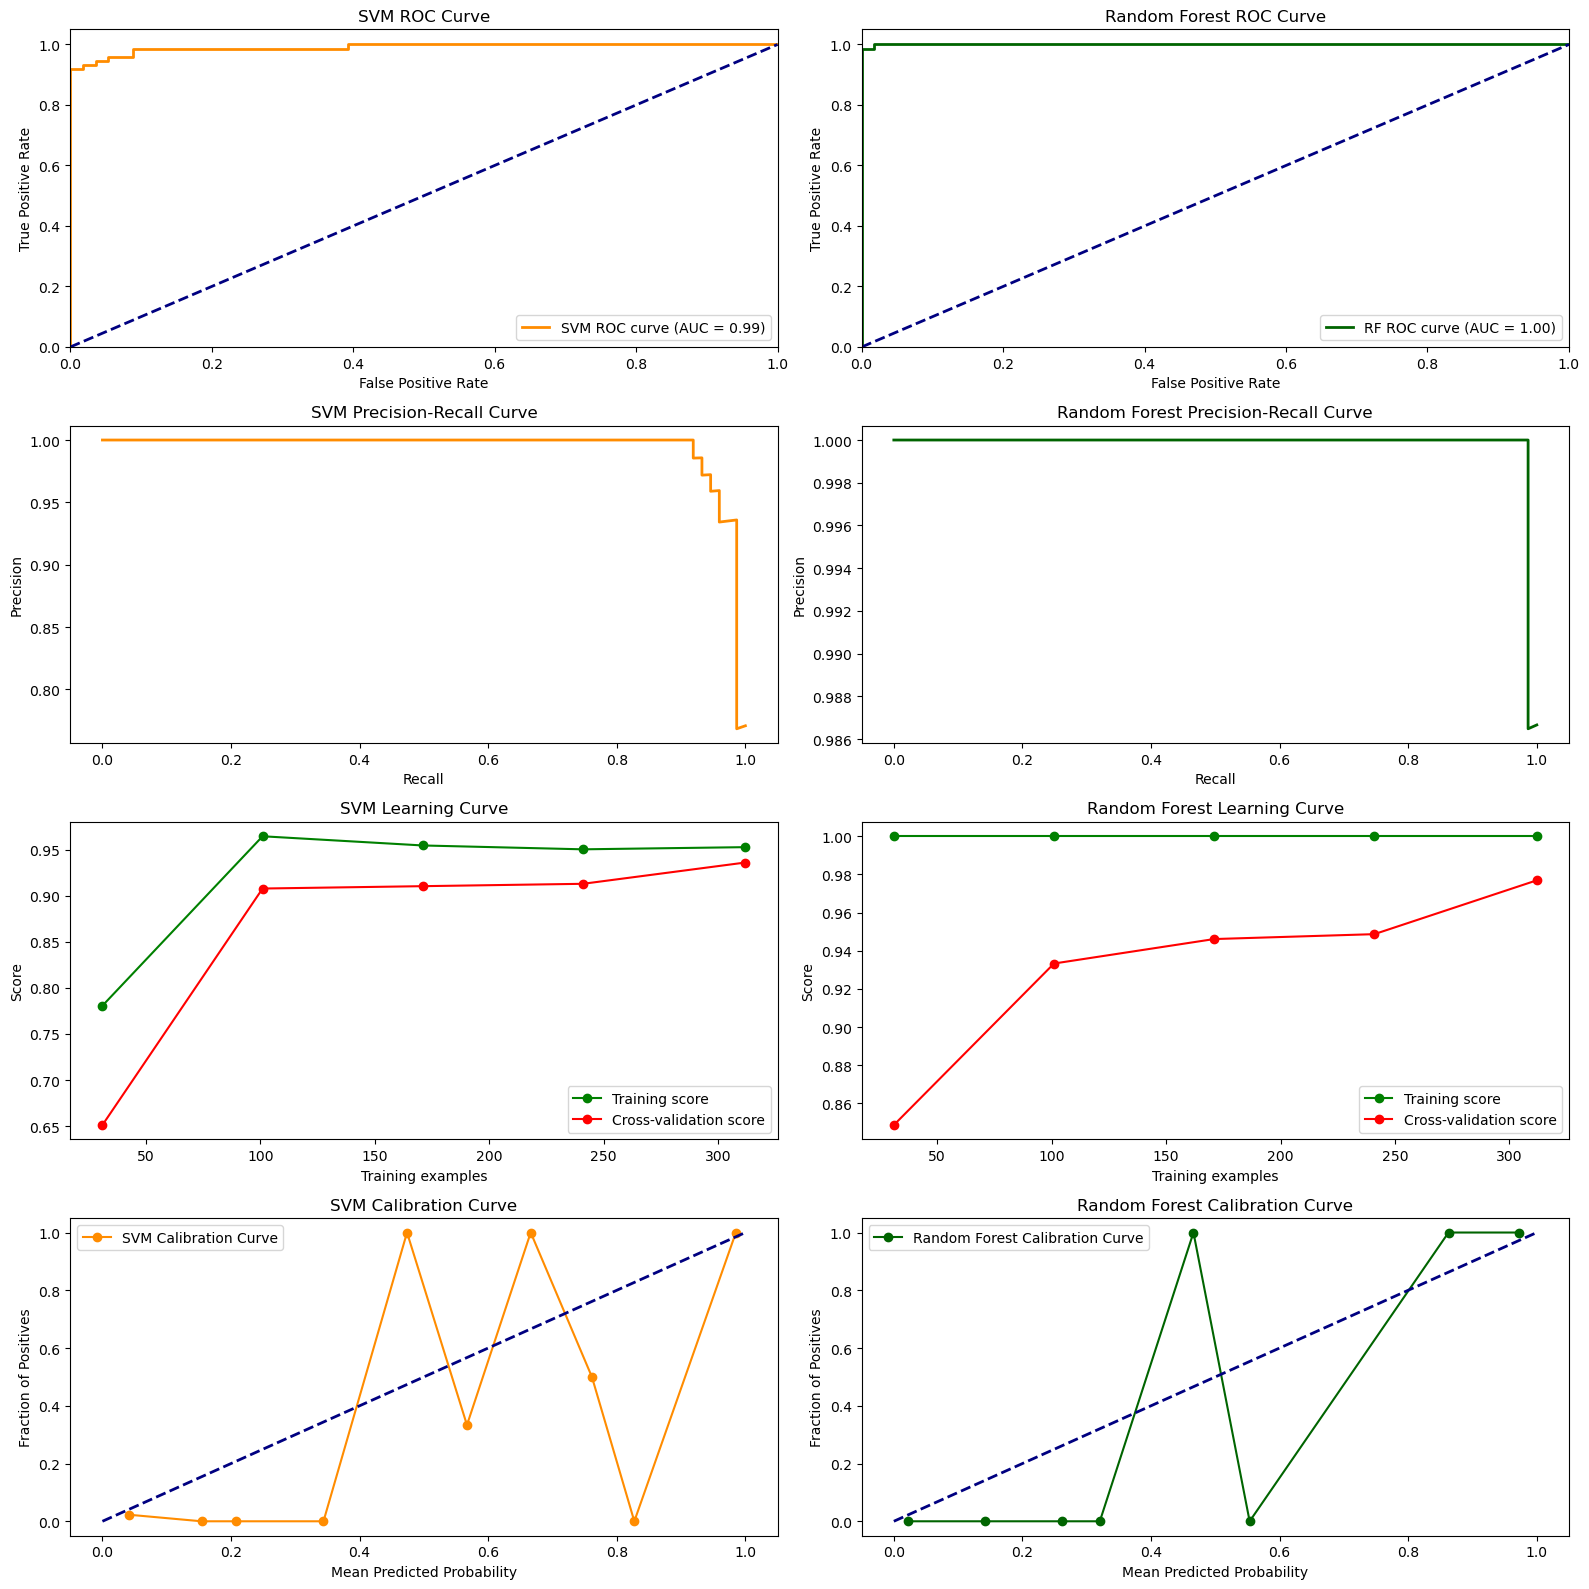

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, PrecisionRecallDisplay
from sklearn.calibration import calibration_curve
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, matthews_corrcoef, classification_report

# Define and fit models
svm = SVC(kernel='rbf', C=1, gamma=0.1, probability=True, random_state=0)
svm.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=103, max_depth=38, max_features='log2', 
                            min_samples_leaf=1, min_samples_split=2, random_state=0)
rf.fit(X_train, y_train)

# Predict probabilities for SVM and Random Forest
y_prob_svm = svm.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# ---- Metrics for SVM ----
pre_test_svm = svm.predict(X_test)
accuracy_test_svm = accuracy_score(y_test, pre_test_svm)
conf_matrix_test_svm = confusion_matrix(y_test, pre_test_svm)
precision_test_svm = precision_score(y_test, pre_test_svm, average='binary')
sensitivity_test_svm = recall_score(y_test, pre_test_svm, average='binary')
specificity_test_svm = conf_matrix_test_svm[0, 0] / (conf_matrix_test_svm[0, 0] + conf_matrix_test_svm[0, 1])
f1_test_svm = f1_score(y_test, pre_test_svm, average='binary')
mcc_test_svm = matthews_corrcoef(y_test, pre_test_svm)

print("SVM Test Set Metrics:")
print(f"Test Accuracy: {accuracy_test_svm}")
print(f"Test Precision: {precision_test_svm}")
print(f"Test Sensitivity (Recall): {sensitivity_test_svm}")
print(f"Test Specificity: {specificity_test_svm}")
print(f"Test F1 Score: {f1_test_svm}")
print(f"Test Matthews Correlation Coefficient: {mcc_test_svm}")
print("Test Confusion Matrix:\n", conf_matrix_test_svm)
print("Test Classification Report:\n", classification_report(y_test, pre_test_svm))

# ---- Metrics for Random Forest ----
pre_test_rf = rf.predict(X_test)
accuracy_test_rf = accuracy_score(y_test, pre_test_rf)
conf_matrix_test_rf = confusion_matrix(y_test, pre_test_rf)
precision_test_rf = precision_score(y_test, pre_test_rf, average='binary')
sensitivity_test_rf = recall_score(y_test, pre_test_rf, average='binary')
specificity_test_rf = conf_matrix_test_rf[0, 0] / (conf_matrix_test_rf[0, 0] + conf_matrix_test_rf[0, 1])
f1_test_rf = f1_score(y_test, pre_test_rf, average='binary')
mcc_test_rf = matthews_corrcoef(y_test, pre_test_rf)

print("\nRandom Forest Test Set Metrics:")
print(f"Test Accuracy: {accuracy_test_rf}")
print(f"Test Precision: {precision_test_rf}")
print(f"Test Sensitivity (Recall): {sensitivity_test_rf}")
print(f"Test Specificity: {specificity_test_rf}")
print(f"Test F1 Score: {f1_test_rf}")
print(f"Test Matthews Correlation Coefficient: {mcc_test_rf}")
print("Test Confusion Matrix:\n", conf_matrix_test_rf)
print("Test Classification Report:\n", classification_report(y_test, pre_test_rf))

# ---- ROC Curve with AUC for SVM and Random Forest ----
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# ---- Precision-Recall Curve for SVM and Random Forest ----
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_prob_svm)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)

# ---- Learning Curve for SVM and Random Forest ----
train_sizes_svm, train_scores_svm, test_scores_svm = learning_curve(svm, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean_svm = np.mean(train_scores_svm, axis=1)
test_scores_mean_svm = np.mean(test_scores_svm, axis=1)

train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(rf, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean_rf = np.mean(train_scores_rf, axis=1)
test_scores_mean_rf = np.mean(test_scores_rf, axis=1)

# ---- Calibration Curve for SVM and Random Forest ----
fraction_of_positives_svm, mean_predicted_value_svm = calibration_curve(y_test, y_prob_svm, n_bins=10)
fraction_of_positives_rf, mean_predicted_value_rf = calibration_curve(y_test, y_prob_rf, n_bins=10)

# ---- Plotting All Curves ----
fig, axs = plt.subplots(4, 2, figsize=(16, 16))

# 1. ROC Curve for SVM
axs[0, 0].plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM ROC curve (AUC = {roc_auc_svm:.2f})')
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('SVM ROC Curve')
axs[0, 0].legend(loc="lower right")

# 2. ROC Curve for Random Forest
axs[0, 1].plot(fpr_rf, tpr_rf, color='darkgreen', lw=2, label=f'RF ROC curve (AUC = {roc_auc_rf:.2f})')
axs[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 1].set_xlim([0.0, 1.0])
axs[0, 1].set_ylim([0.0, 1.05])
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('Random Forest ROC Curve')
axs[0, 1].legend(loc="lower right")

# 3. Precision-Recall Curve for SVM
axs[1, 0].plot(recall_svm, precision_svm, lw=2, color='darkorange')
axs[1, 0].set_xlabel('Recall')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].set_title('SVM Precision-Recall Curve')

# 4. Precision-Recall Curve for Random Forest
axs[1, 1].plot(recall_rf, precision_rf, lw=2, color='darkgreen')
axs[1, 1].set_xlabel('Recall')
axs[1, 1].set_ylabel('Precision')
axs[1, 1].set_title('Random Forest Precision-Recall Curve')

# 5. Learning Curve for SVM
axs[2, 0].plot(train_sizes_svm, train_scores_mean_svm, 'o-', color='green', label='Training score')
axs[2, 0].plot(train_sizes_svm, test_scores_mean_svm, 'o-', color='red', label='Cross-validation score')
axs[2, 0].set_xlabel('Training examples')
axs[2, 0].set_ylabel('Score')
axs[2, 0].set_title('SVM Learning Curve')
axs[2, 0].legend(loc="best")

# 6. Learning Curve for Random Forest
axs[2, 1].plot(train_sizes_rf, train_scores_mean_rf, 'o-', color='green', label='Training score')
axs[2, 1].plot(train_sizes_rf, test_scores_mean_rf, 'o-', color='red', label='Cross-validation score')
axs[2, 1].set_xlabel('Training examples')
axs[2, 1].set_ylabel('Score')
axs[2, 1].set_title('Random Forest Learning Curve')
axs[2, 1].legend(loc="best")


# 7. Calibration Curve for SVM
axs[3, 0].plot(mean_predicted_value_svm, fraction_of_positives_svm, marker='o', color='darkorange', label='SVM Calibration Curve')
axs[3, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[3, 0].set_xlabel('Mean Predicted Probability')
axs[3, 0].set_ylabel('Fraction of Positives')
axs[3, 0].set_title('SVM Calibration Curve')
axs[3, 0].legend(loc="best")

# 8. Calibration Curve for Random Forest
axs[3, 1].plot(mean_predicted_value_rf, fraction_of_positives_rf, marker='o', color='darkgreen', label='Random Forest Calibration Curve')
axs[3, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[3, 1].set_xlabel('Mean Predicted Probability')
axs[3, 1].set_ylabel('Fraction of Positives')
axs[3, 1].set_title('Random Forest Calibration Curve')
axs[3, 1].legend(loc="best")


plt.tight_layout()
plt.show()


# voting classifier to combine SVM and Random Forest with evaluation ***

Voting Classifier Test Metrics:
Accuracy: 0.9846153846153847
Precision: 0.9864864864864865
Sensitivity (Recall): 0.9864864864864865
Specificity: 0.9821428571428571
F1 Score: 0.9864864864864865
Matthews Correlation Coefficient: 0.9686293436293436
Confusion Matrix:
 [[55  1]
 [ 1 73]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        56
           1       0.99      0.99      0.99        74

    accuracy                           0.98       130
   macro avg       0.98      0.98      0.98       130
weighted avg       0.98      0.98      0.98       130



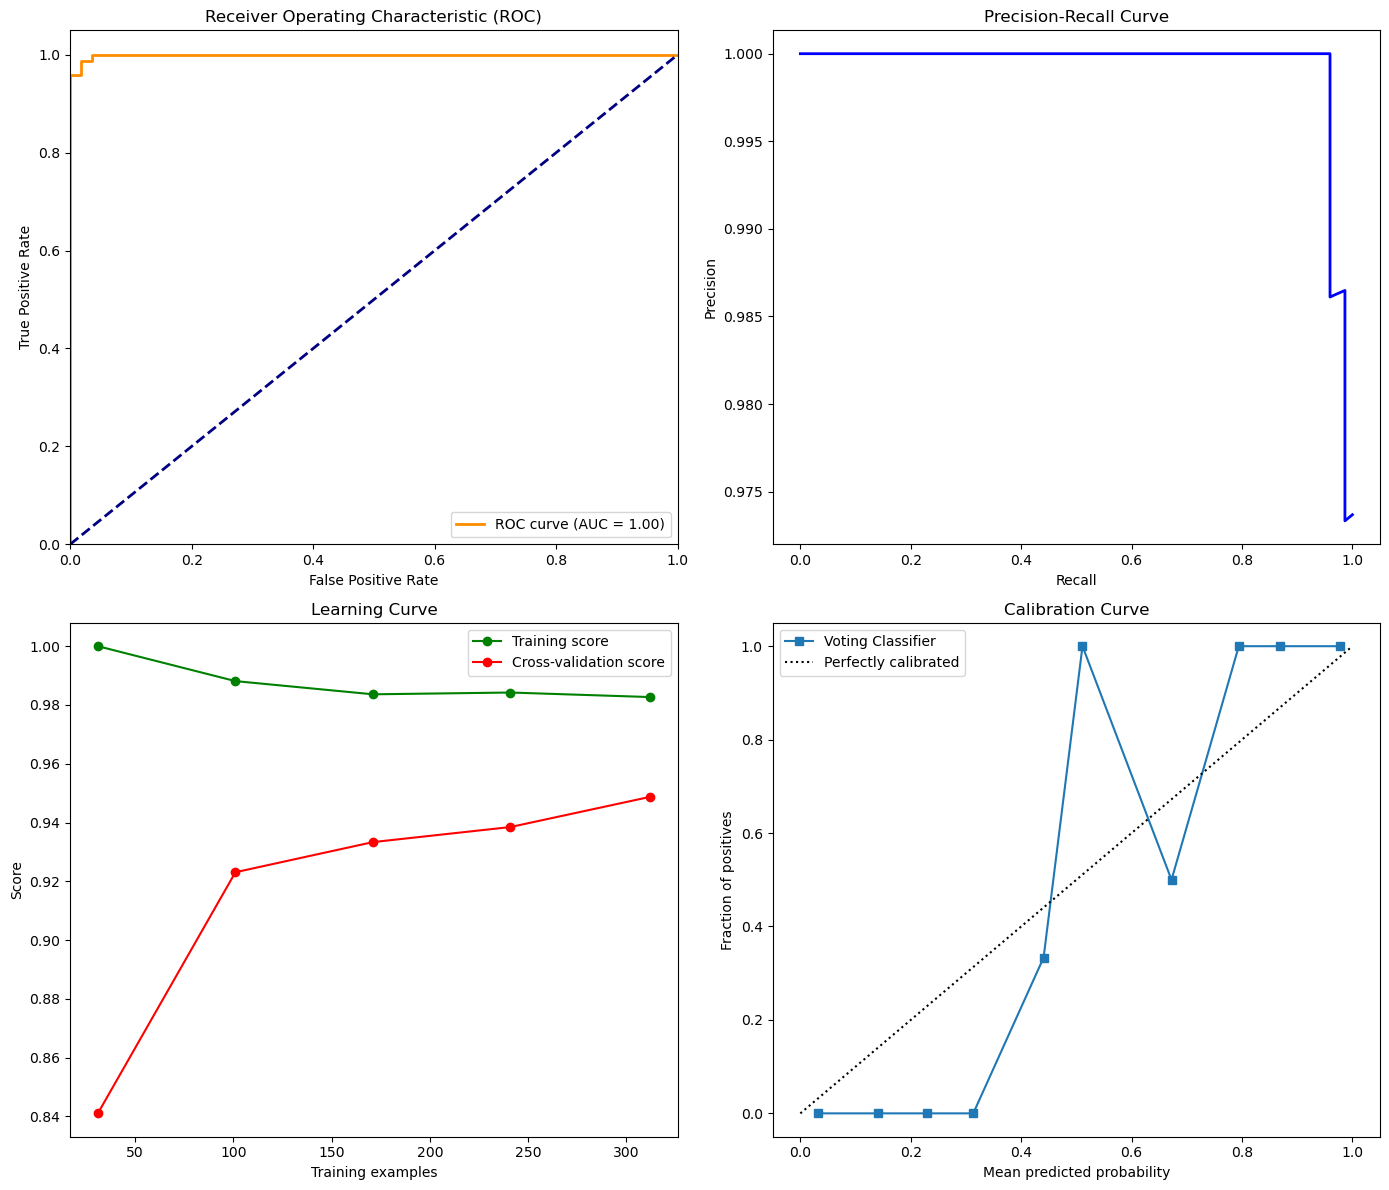

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, PrecisionRecallDisplay
from sklearn.calibration import calibration_curve
from sklearn.model_selection import learning_curve
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define base models
base_models = [
    ('svm', SVC(kernel='rbf', C=1, gamma=0.1, probability=True, random_state=0)),
    ('rf', RandomForestClassifier(n_estimators=103, max_depth=38, max_features='log2', 
                                  min_samples_leaf=1, min_samples_split=2, random_state=0))
]

# Define the voting classifier
voting_clf = VotingClassifier(estimators=base_models, voting='soft')  # Use soft voting to get probabilities

# Fit the voting classifier
voting_clf.fit(X_train, y_train)

# Predict probabilities for ROC, Precision-Recall, and Calibration curve
y_prob = voting_clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
y_pred = voting_clf.predict(X_test)

# ---- Metrics Calculation ----
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             matthews_corrcoef, confusion_matrix, classification_report)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Use 'macro' or 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='binary')  # Sensitivity is the same as recall
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Confusion matrix and Specificity calculation
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)  # Specificity calculation

# Print metrics
print("Voting Classifier Test Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Sensitivity (Recall): {recall}")
print(f"Specificity: {specificity}")
print(f"F1 Score: {f1}")
print(f"Matthews Correlation Coefficient: {mcc}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

# ---- ROC Curve with AUC ----
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# ---- Precision-Recall Curve ----
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# ---- Learning Curve ----
train_sizes, train_scores, test_scores = learning_curve(voting_clf, X_train, y_train, cv=5, n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# ---- Calibration Curve ----
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_prob, n_bins=10)

# ---- Plotting All Curves Together ----
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# 1. ROC Curve
axs[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('Receiver Operating Characteristic (ROC)')
axs[0, 0].legend(loc="lower right")

# 2. Precision-Recall Curve
axs[0, 1].plot(recall, precision, lw=2, color='blue')
axs[0, 1].set_xlabel('Recall')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_title('Precision-Recall Curve')

# 3. Learning Curve
axs[1, 0].plot(train_sizes, train_scores_mean, 'o-', color='green', label='Training score')
axs[1, 0].plot(train_sizes, test_scores_mean, 'o-', color='red', label='Cross-validation score')
axs[1, 0].set_xlabel('Training examples')
axs[1, 0].set_ylabel('Score')
axs[1, 0].set_title('Learning Curve')
axs[1, 0].legend(loc="best")

# 4. Calibration Curve
axs[1, 1].plot(mean_predicted_value, fraction_of_positives, "s-", label="Voting Classifier")
axs[1, 1].plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
axs[1, 1].set_xlabel('Mean predicted probability')
axs[1, 1].set_ylabel('Fraction of positives')
axs[1, 1].set_title('Calibration Curve')
axs[1, 1].legend(loc="best")

plt.tight_layout()
plt.show()


# Cross-Validation with Voting Classifier

In [89]:
# from sklearn.model_selection import cross_val_score

# # Perform cross-validation
# cv_scores = cross_val_score(voting_clf, X, y, cv=5)  # 5-fold cross-validation

# print(f'Cross-validated accuracy scores: {cv_scores}')
# print(f'Mean cross-validated accuracy: {cv_scores.mean()}')


# Stacking Classifier to combine multiple models***

In [96]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, matthews_corrcoef, classification_report

# Define the base estimators
estimators = [
    ('svm', SVC(kernel='rbf', C=1, gamma=0.1, probability=True, random_state=0)),
    ('rf', RandomForestClassifier(n_estimators=103, max_depth=38, max_features='log2', min_samples_leaf=1, min_samples_split=2, random_state=0))
]

# Define the final estimator (neural network)
final_estimator = MLPClassifier(activation='tanh', hidden_layer_sizes=(100,), solver='adam', random_state=0)

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5)

# Fit the model
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred = stacking_clf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Use 'macro' or 'weighted' for multi-class
sensitivity = recall_score(y_test, y_pred, average='binary')  # Sensitivity is the same as recall
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
f1 = f1_score(y_test, y_pred, average='binary')
mcc = matthews_corrcoef(y_test, y_pred)

# Print metrics
print("Stacking Classifier Test Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Sensitivity (Recall): {sensitivity}")
print(f"Specificity: {specificity}")
print(f"F1 Score: {f1}")
print(f"Matthews Correlation Coefficient: {mcc}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))


Stacking Classifier Test Metrics:
Accuracy: 0.9743589743589743
Precision: 0.9787234042553191
Sensitivity (Recall): 0.9787234042553191
Specificity: 0.967741935483871
F1 Score: 0.9787234042553191
Matthews Correlation Coefficient: 0.9464653397391901
Confusion Matrix:
 [[60  2]
 [ 2 92]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        62
           1       0.98      0.98      0.98        94

    accuracy                           0.97       156
   macro avg       0.97      0.97      0.97       156
weighted avg       0.97      0.97      0.97       156



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Evaluation for combination of base model output by stacking layer

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, PrecisionRecallDisplay
from sklearn.calibration import calibration_curve
from sklearn.model_selection import learning_curve
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define base models
base_models = [
    ('svm', SVC(kernel='rbf', C=1, gamma=0.1, probability=True, random_state=0)),
    ('rf', RandomForestClassifier(n_estimators=103, max_depth=38, max_features='log2', 
                                  min_samples_leaf=1, min_samples_split=2, random_state=0))
]

# Define the final estimator
final_estimator = LogisticRegression(random_state=0)

# Define the stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=final_estimator, passthrough=False)

# Fit the stacking classifier
stacking_clf.fit(X_train, y_train)

# Predict probabilities for ROC, Precision-Recall, and Calibration curve
y_prob = stacking_clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
y_pred = stacking_clf.predict(X_test)

# ---- Metrics Calculation ----
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             matthews_corrcoef, confusion_matrix, classification_report)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Use 'macro' or 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='binary')  # Sensitivity is the same as recall
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Confusion matrix and Specificity calculation
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)  # Specificity calculation

# Print metrics
print("Stacking Classifier Test Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Sensitivity (Recall): {recall}")
print(f"Specificity: {specificity}")
print(f"F1 Score: {f1}")
print(f"Matthews Correlation Coefficient: {mcc}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

# ---- ROC Curve with AUC ----
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# ---- Precision-Recall Curve ----
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# ---- Learning Curve ----
train_sizes, train_scores, test_scores = learning_curve(stacking_clf, X_train, y_train, cv=5, n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# ---- Calibration Curve ----
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_prob, n_bins=10)

# ---- Plotting All Curves Together ----
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# 1. ROC Curve
axs[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('Receiver Operating Characteristic (ROC)')
axs[0, 0].legend(loc="lower right")

# 2. Precision-Recall Curve
axs[0, 1].plot(recall, precision, lw=2, color='blue')
axs[0, 1].set_xlabel('Recall')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_title('Precision-Recall Curve')

# 3. Learning Curve
axs[1, 0].plot(train_sizes, train_scores_mean, 'o-', color='green', label='Training score')
axs[1, 0].plot(train_sizes, test_scores_mean, 'o-', color='red', label='Cross-validation score')
axs[1, 0].set_xlabel('Training examples')
axs[1, 0].set_ylabel('Score')
axs[1, 0].set_title('Learning Curve')
axs[1, 0].legend(loc="best")

# 4. Calibration Curve
axs[1, 1].plot(mean_predicted_value, fraction_of_positives, "s-", label="Stacking Classifier")
axs[1, 1].plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
axs[1, 1].set_xlabel('Mean predicted probability')
axs[1, 1].set_ylabel('Fraction of positives')
axs[1, 1].set_title('Calibration Curve')
axs[1, 1].legend(loc="best")

plt.tight_layout()
plt.show()


NameError: name 'X_train' is not defined

# Evaluation Curve for Meta model Final Prediction

Final Meta-Model Test accuracy: 0.991304347826087
Precision: 1.0
Sensitivity (Recall): 0.9852941176470589
Specificity: 1.0
F1 Score: 0.9925925925925926
Matthews Correlation Coefficient: 0.9822256140331228
Confusion Matrix:
[[47  0]
 [ 1 67]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        47
           1       1.00      0.99      0.99        68

    accuracy                           0.99       115
   macro avg       0.99      0.99      0.99       115
weighted avg       0.99      0.99      0.99       115



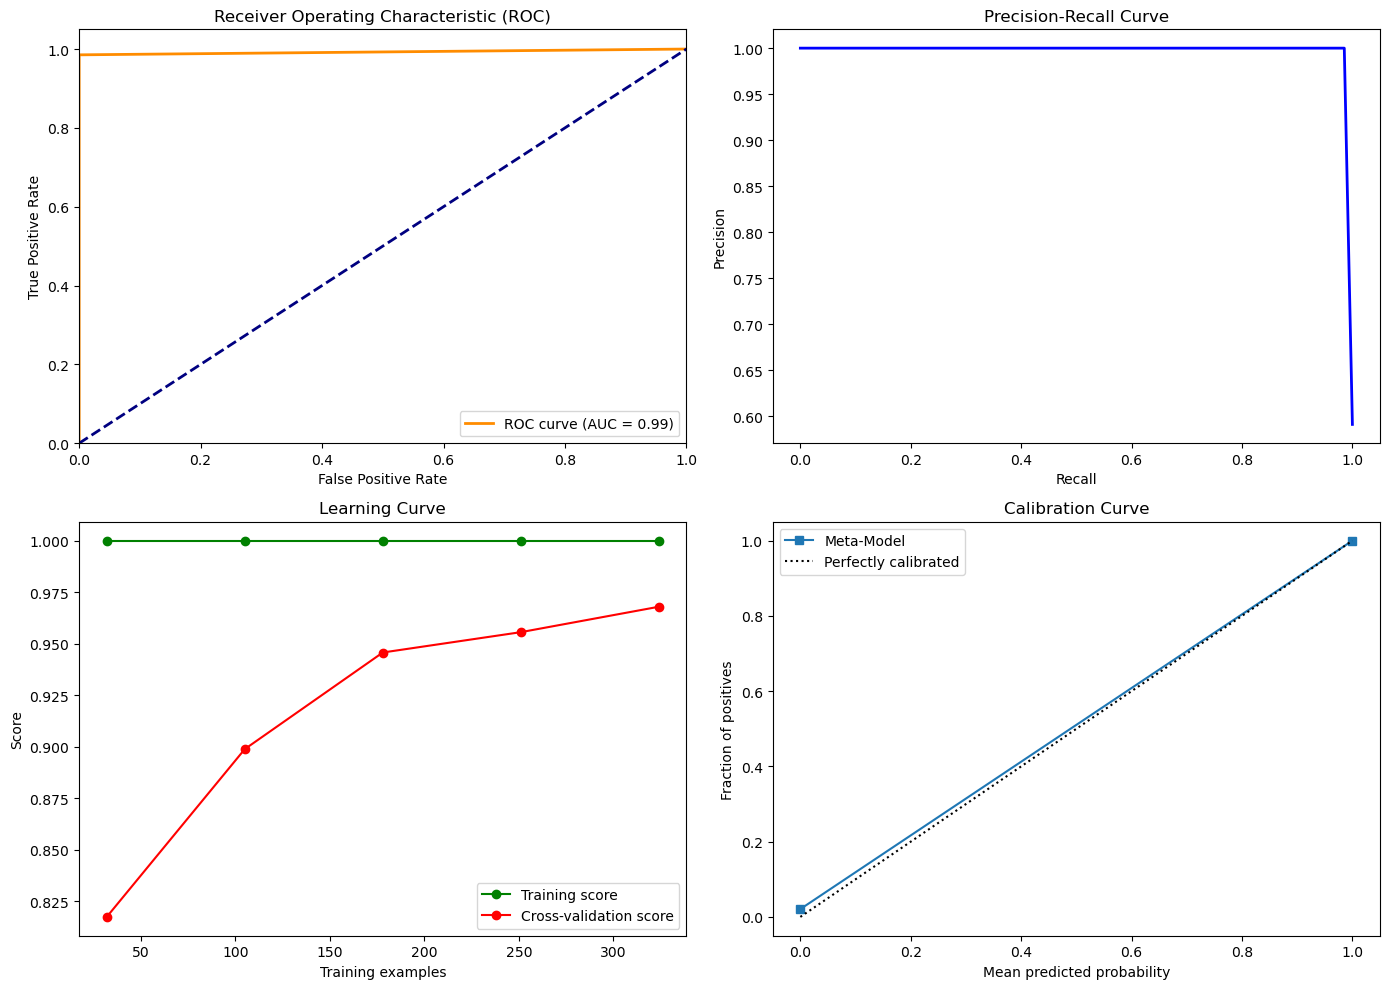

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (roc_curve, roc_auc_score, precision_recall_curve, 
                             accuracy_score, precision_score, recall_score, f1_score, 
                             matthews_corrcoef, confusion_matrix, classification_report)
from sklearn.calibration import calibration_curve
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.svm import SVC  
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Define base models
base_models = [
    ('svm', SVC(kernel='rbf', C=1, gamma=0.1, probability=True, random_state=0)),
    ('rf', RandomForestClassifier(n_estimators=103, max_depth=38, max_features='log2', 
                                  min_samples_leaf=1, min_samples_split=2, random_state=0))
]

# Meta model (Choose one here)
meta_model1 = GradientBoostingClassifier()  # LogisticRegression(), MLPClassifier() can also be used

# Split data (replace X and y with your actual data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=0)

# Fit base models and get predictions from them
base_train_preds = np.zeros((X_train.shape[0], len(base_models)))  # Collect training predictions for meta-model
base_test_preds = np.zeros((X_test.shape[0], len(base_models)))  # Collect test predictions for meta-model

for idx, (name, model) in enumerate(base_models):
    # Train the base model
    model.fit(X_train, y_train)
    
    # Get predictions on the training and test sets
    base_train_preds[:, idx] = model.predict_proba(X_train)[:, 1]  # Probability of class 1
    base_test_preds[:, idx] = model.predict_proba(X_test)[:, 1]

# Fit the meta-model using the base model predictions as input features
meta_model1.fit(base_train_preds, y_train)

# Predict using the meta-model on the test data
final_predictions = meta_model1.predict(base_test_preds)
y_prob = meta_model1.predict_proba(base_test_preds)[:, 1]  # Probabilities for the positive class

# Compute various metrics
accuracy = accuracy_score(y_test, final_predictions)
precision = precision_score(y_test, final_predictions)
recall = recall_score(y_test, final_predictions)  # Sensitivity
f1 = f1_score(y_test, final_predictions)
mcc = matthews_corrcoef(y_test, final_predictions)

# Confusion matrix and Specificity calculation
conf_matrix = confusion_matrix(y_test, final_predictions)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)  # Specificity calculation

# Display the metrics
print(f'Final Meta-Model Test accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Sensitivity (Recall): {recall}')
print(f'Specificity: {specificity}')
print(f'F1 Score: {f1}')
print(f'Matthews Correlation Coefficient: {mcc}')
print(f'Confusion Matrix:\n{conf_matrix}')
print('Classification Report:\n', classification_report(y_test, final_predictions))

# ---- Visualization Section ----

# Plot ROC Curve with AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.subplot(2, 2, 2)
plt.plot(recall, precision, lw=2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Plot Learning Curve
train_sizes, train_scores, test_scores = learning_curve(meta_model1, X_train, y_train, cv=5, n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.subplot(2, 2, 3)
plt.plot(train_sizes, train_scores_mean, 'o-', color='green', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='red', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc="best")

# Plot Calibration Curve
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_prob, n_bins=10)

plt.subplot(2, 2, 4)
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="Meta-Model")
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curve')
plt.legend(loc="best")

plt.tight_layout()
plt.show()






# Visualization 

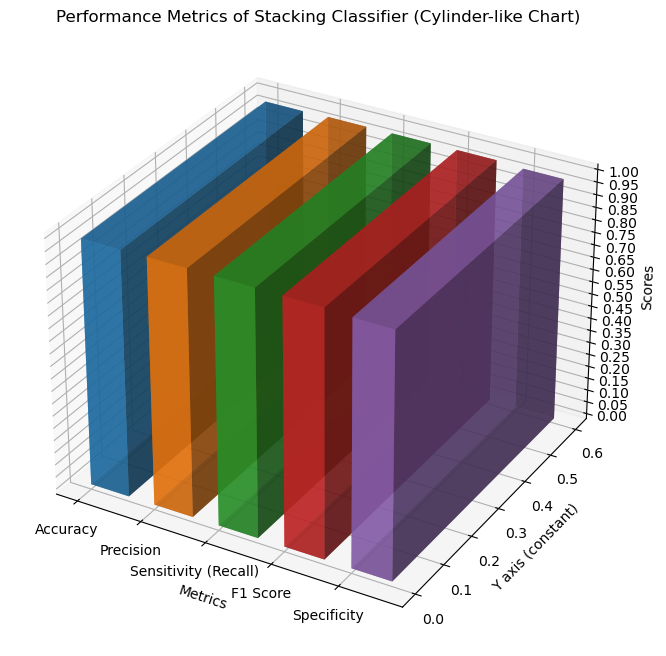

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             matthews_corrcoef, confusion_matrix)

# Define base models
base_models = [
    ('svm', SVC(kernel='rbf', C=1, gamma=0.1, probability=True, random_state=0)),
    ('rf', RandomForestClassifier(n_estimators=103, max_depth=38, max_features='log2', min_samples_leaf=1, min_samples_split=2, random_state=0))
]

# Define the meta-model (Logistic Regression in this case)
meta_model = LogisticRegression()

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit the stacking classifier
stacking_clf.fit(X_train, y_train)

# Predict using the stacking classifier
y_pred_stacking = stacking_clf.predict(X_test)

# Compute various metrics
accuracy = accuracy_score(y_test, y_pred_stacking)
precision = precision_score(y_test, y_pred_stacking)
recall = recall_score(y_test, y_pred_stacking)  # Sensitivity
f1 = f1_score(y_test, y_pred_stacking)
mcc = matthews_corrcoef(y_test, y_pred_stacking)

# Confusion matrix and Specificity calculation
conf_matrix = confusion_matrix(y_test, y_pred_stacking)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)  # Specificity calculation

# Metrics for plotting
metrics = [accuracy, precision, recall, f1, specificity]
metrics_names = ['Accuracy', 'Precision', 'Sensitivity (Recall)', 'F1 Score', 'Specificity']

# Create a cylindrical-like bar chart
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define positions and size
x_pos = np.arange(len(metrics))
y_pos = np.zeros(len(metrics))
z_pos = np.zeros(len(metrics))

dx = np.ones(len(metrics)) * 0.6  # Width of the bars
dy = np.ones(len(metrics)) * 0.6  # Depth of the bars
dz = metrics  # Height of the bars

# Define colors for each bar
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create bars
ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color=colors, alpha=0.7)

# Labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Y axis (constant)')
ax.set_zlabel('Scores')
ax.set_title('Performance Metrics of Stacking Classifier (Cylinder-like Chart)')

# Set x-axis ticks and labels
ax.set_xticks(x_pos)
ax.set_xticklabels(metrics_names)

# Set z-axis range and ticks
ax.set_zlim(0, 1)
ax.set_zticks(np.arange(0, 1.05, 0.05))

plt.show()


# Risk Level Prediction

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset from a specified path
df = pd.read_csv('diabetes_data_upload.csv')

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to all categorical columns except the target 'class'
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

# Define the symptom columns after label encoding
symptom_columns = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 
                   'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 
                   'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 
                   'Alopecia', 'Obesity']

# Function to calculate the risk score
def calculate_risk_score(row):
    return row[symptom_columns].sum()

# Function to classify risk based on the risk score
def classify_risk_level(score):
    if score < 4:
        return 'Low Risk'
    elif score < 10:
        return 'Moderate Risk'
    else:
        return 'High Risk'

# Calculate Risk Score for all records where class == 1
df['Risk Score'] = df.apply(lambda row: calculate_risk_score(row) if row['class'] == 1 else None, axis=1)

# Classify Risk Level based on the calculated Risk Score
df['Risk Level'] = df.apply(lambda row: classify_risk_level(row['Risk Score']) if row['class'] == 1 else None, axis=1)

# Display the first 10 records of the updated DataFrame
print(df.head(10))

# Save the entire updated DataFrame to a CSV file
df.to_csv('diabetes_risk_levels.csv', index=False)

print("The updated dataset with risk levels has been saved to 'diabetes_risk_levels.csv'.")


# Risk Level Prediction with Age consideration 

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset from a specified path
df = pd.read_csv('diabetes_data_upload.csv')

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to all categorical columns except the target 'class'
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

# Define the symptom columns and consider age in risk calculation
symptom_columns = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 
                   'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 
                   'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 
                   'Alopecia', 'Obesity']

# Function to calculate the risk score
def calculate_risk_score(row):
    age_factor = row['Age'] / 10  # Example: age is scaled down by a factor of 10
    symptom_score = row[symptom_columns].sum()
    return symptom_score + age_factor

# Function to classify risk based on the risk score
def classify_risk_level(score):
    if score < 5:
        return 'Low Risk'
    elif score < 12:
        return 'Moderate Risk'
    else:
        return 'High Risk'

# Calculate Risk Score for all records where class == 1
df['Risk Score'] = df.apply(lambda row: calculate_risk_score(row) if row['class'] == 1 else None, axis=1)

# Classify Risk Level based on the calculated Risk Score
df['Risk Level'] = df.apply(lambda row: classify_risk_level(row['Risk Score']) if row['class'] == 1 else None, axis=1)

# Display the first 10 records of the updated DataFrame
print(df.head(10))

# Save the entire updated DataFrame to a CSV file
df.to_csv('diabetes_risk_levels_with_age.csv', index=False)

print("The updated dataset with risk levels has been saved to 'diabetes_risk_levels_with_age.csv'.")


# Normalize age visualization  

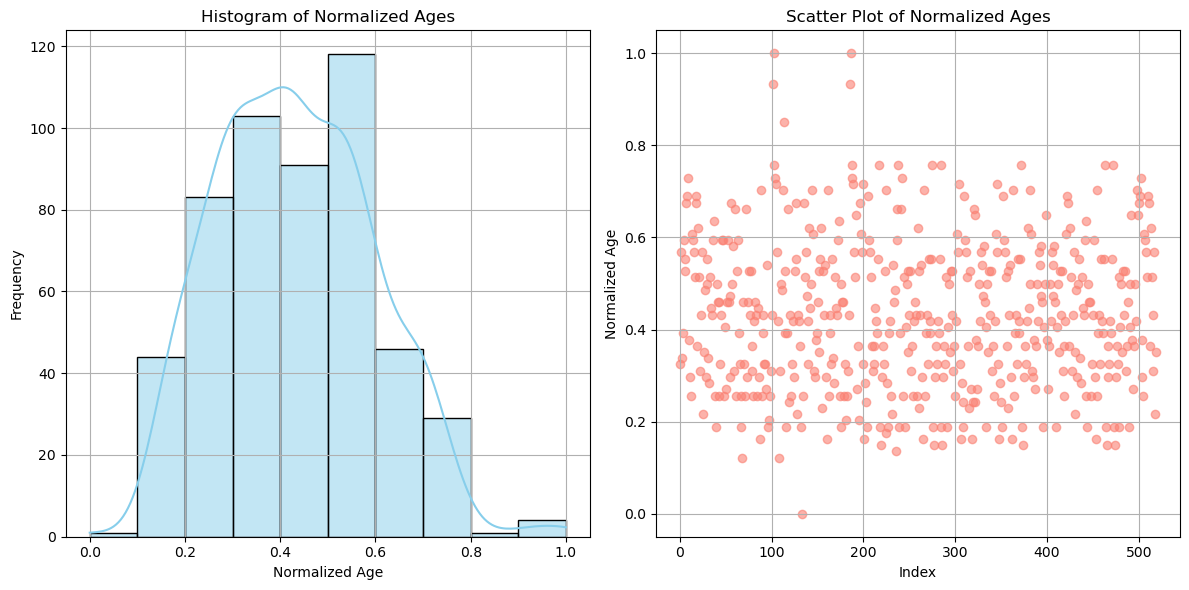

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Sample DataFrame creation
# df = pd.DataFrame({'Age': [23, 45, 35, 50, 30, 22, 39, 41, 48, 52]})

# Normalize the 'Age' column
ages = df["Age"]
df["Age_Normalized"] = (ages - np.min(ages)) / (np.max(ages) - np.min(ages))





plt.figure(figsize=(12, 6))

# Plot histogram
plt.subplot(1, 2, 1)
sns.histplot(df["Age_Normalized"], bins=10, kde=True, color='skyblue')
plt.title('Histogram of Normalized Ages')
plt.xlabel('Normalized Age')
plt.ylabel('Frequency')
plt.grid(True)

# Plot scatter plot
plt.subplot(1, 2, 2)
plt.scatter(df.index, df["Age_Normalized"], color='salmon', alpha=0.6)
plt.title('Scatter Plot of Normalized Ages')
plt.xlabel('Index')
plt.ylabel('Normalized Age')
plt.grid(True)

plt.tight_layout()
plt.show()


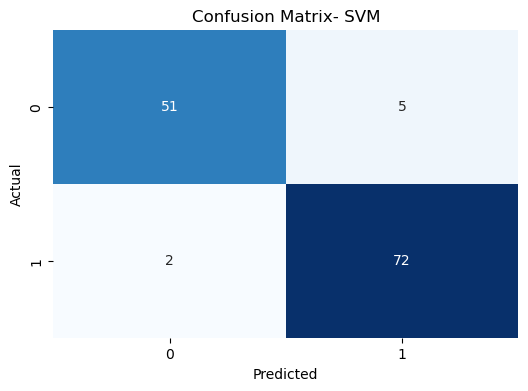

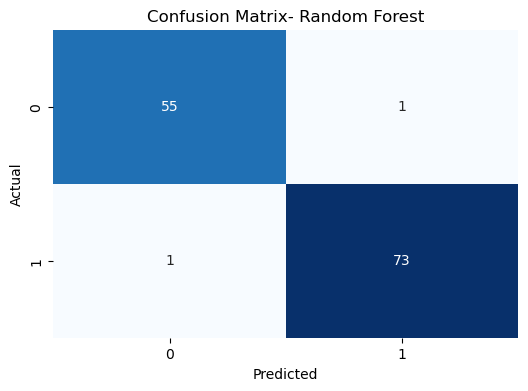

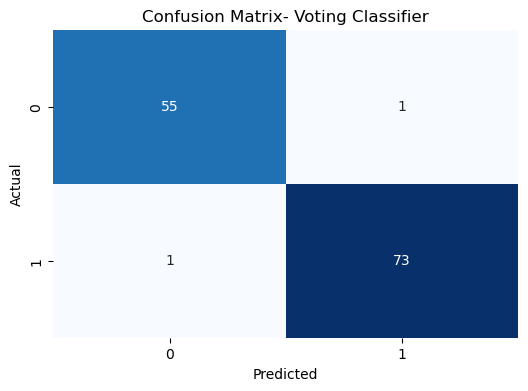

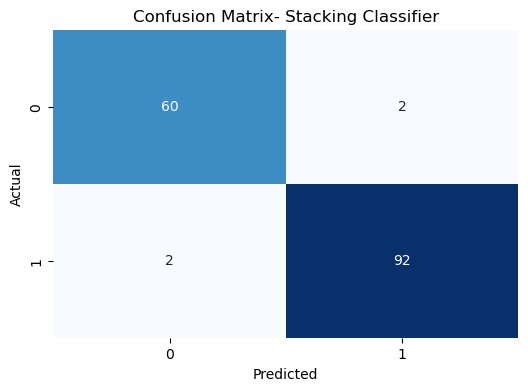

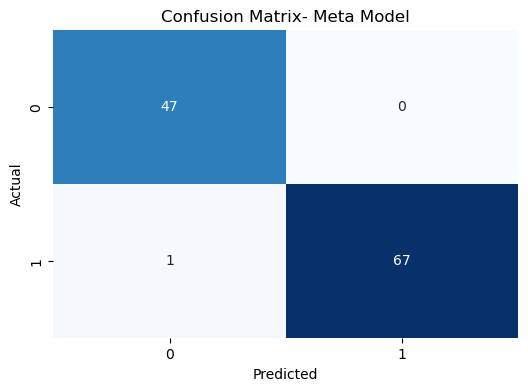

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define confusion matrices for each model
conf_matrices = {
    'SVM': np.array([[51, 5], [2, 72]]),
    'Random Forest': np.array([[55, 1], [1, 73]]),
    'Voting Classifier': np.array([[55, 1], [1, 73]]),
    'Stacking Classifier': np.array([[60, 2], [2, 92]]),
    'Meta Model': np.array([[47, 0], [1, 67]])
}

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix- {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot each confusion matrix
for model_name, conf_matrix in conf_matrices.items():
    plot_confusion_matrix(conf_matrix, model_name)
